In [64]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('seaborn-bright')

from pandas import DataFrame

import sklearn
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.metrics import f1_score, classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

from scipy import stats
from scipy.stats import norm, skew
import statsmodels.formula.api as sm

import warnings
import re
warnings.filterwarnings('ignore')

%matplotlib inline

In [65]:
def importdata():
    data = pd.read_csv('heart.csv')
    
    print("Dataset : \n", data.head())
    print("")
    print ("Dataset Shape : ", data.shape)
    print("")
    data.info()
    print("")
    
    #check for null values
    print("Check for null values : \n", data.isnull().sum())
    print("")
    
    #check for unique values of the attributes
    #print("unique values of gender :", data.sex.unique())
    #print("unique values of chest pain type :", data.cp.unique())
    #print("unique values of fasting blood sugar > 120 mg/dl :", data.fbs.unique())
    #print("unique values of resting electrocardiographic results :", data.restecg.unique())
    #print("unique values of exercise induced angina :", data.exng.unique())
    #print("unique values of slp :", data.slp.unique())
    #print("unique values of number of major vessels :", data.caa.unique())
    #print("unique values of thall :", data.thall.unique())
    #print("")
    
    #pairwise correlation
    print("Pairwise correlation : \n", data.corr())
    print("")
    
    return data

In [66]:
#split dataset in to train data and test data
def splitdataset(data):
    # Separating the target variable
    X,Y = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']], data[['output']]
    
    # Splitting the dataset into train and test
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.33, random_state=42)
    
    return X, Y, X_train, X_test, Y_train, Y_test

In [67]:
#train model using gini index
def train_using_gini(X_train, X_test, Y_train):
    tree = DecisionTreeClassifier(criterion = "gini", random_state = 35, max_depth=3, min_samples_leaf=2, 
                                  splitter="random", min_samples_split=5, max_features=None, max_leaf_nodes=None)
    tree.fit(X_train, Y_train)
    return tree

In [68]:
#model reuslts prediction
def prediction(X_test, tree):
    predicted = tree.predict(X_test)
    return predicted

In [69]:
#calculate accuracy and show confusion matrix + accuracy report
def cal_accuracy(X_test, Y_test, predicted, tree):
    predicted=predicted.reshape(100,1)
    
    #accracy
    error = abs(predicted - Y_test)
    errorMean = round(np.mean(error),2)
    #ac = 1-round(np.mean(error),2)
    print("error mean : ", errorMean)
    print("")
    
    #confusion matrix
    cm = confusion_matrix(Y_test, predicted)
    print("confusion matrix : \n", cm)
    
    #plot confusion matrix
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap = plt.cm.Wistia)
    classNames = ['Negative', 'Positive']
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation = 45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN','TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+ " = "+str(cm[i][j]))
    plotCm = plt.show()
    
    #prediction probability
    predicted_prob = tree.predict_proba(X_test)[:,1]
    
    # Accuray report AUC
    accuracy = metrics.accuracy_score(Y_test, predicted)
    auc = metrics.roc_auc_score(Y_test, predicted_prob)
    print("Accuracy (overall correct predictions):",  round(accuracy,2))
    print("Auc:", round(auc,2))
    
    # Precision e Recall
    recall = metrics.recall_score(Y_test, predicted)
    precision = metrics.precision_score(Y_test, predicted)
    F1_score = metrics.f1_score(Y_test, predicted)
    print("Recall (all 1s predicted right):", round(recall,2))
    print("Precision (confidence when predicting a 1):", round(precision,2))
    print("F1 score :", round(F1_score,2))
    print("Detail:")
    print(metrics.classification_report(Y_test, predicted, target_names=[str(i) for i in np.unique(Y_test)]))
    
    return

Dataset : 
    age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  

Dataset Shape :  (303, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol    

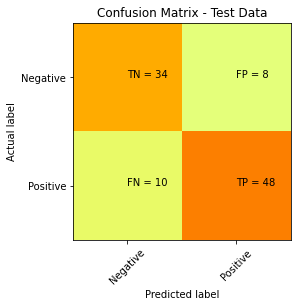

Accuracy (overall correct predictions): 0.82
Auc: 0.86
Recall (all 1s predicted right): 0.83
Precision (confidence when predicting a 1): 0.86
F1 score : 0.84
Detail:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79        42
           1       0.86      0.83      0.84        58

    accuracy                           0.82       100
   macro avg       0.81      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



In [70]:
#Function main
def main():
    # Building Phase
    data = importdata()
    X, Y, X_train, X_test, Y_train, Y_test = splitdataset(data)
    tree = train_using_gini(X_train, X_test, Y_train)
    
    tree_prediction = prediction(X_test, tree)
    cal_accuracy(X_test, Y_test, tree_prediction, tree)
    
# Calling main function
if __name__=="__main__":
    main()